In [35]:
import pandas
import matplotlib.pyplot as plt
'''
    离差标准化数据（最小 - 最大标准化）结果是将原始数据的数值映射到[0,1]区间
    公式：X^* = (X - MIN) / (MAX - MIN)
    如果想将映射数值改到[1,10]区间的方法
    公式：v' = [(X - MIN) / (MAX - MIN)] * (new_max - new_min) + new_min
'''
pay = pandas.read_csv(
    'C:\\Users\\26440\\Desktop\\jupyter_ipynb\\python_source\\data\\user_pay_info.csv'
    ,encoding='gbk',index_col=0)
pay
# plt.hist(pay.每月支出,bins=5)
# plt.show()

,每月支出
编号,
0,6807.50
1,4780.45
2,1959.00
3,5011.06
4,4557.21
...,...
2170,4373.94
2171,7486.03
2172,6476.80


In [36]:
#最大最小标准化(0,1)区间
# plt.hist(pay.每月支出,bins=5)
# plt.show()
def min_max_scale(data):
    new = (data - data.min()) / (data.max() - data.min())
    return new
new = min_max_scale(pay.每月支出)
new
# plt.hist(new,bins=5)
# plt.show()

编号
0       0.615543
1       0.431867
2       0.176208
3       0.452763
4       0.411638
          ...   
2170    0.395032
2171    0.677026
2172    0.585577
2173    0.009803
2174    0.353197
Name: 每月支出, Length: 2175, dtype: float64

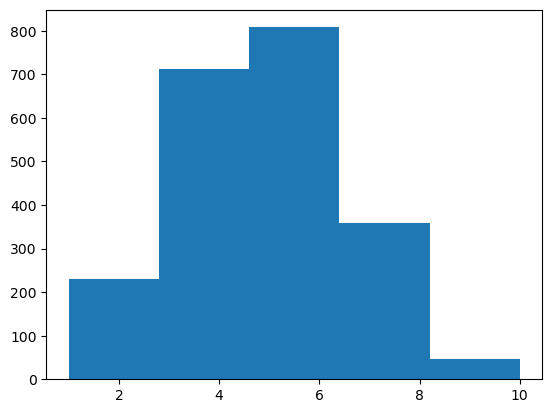

In [37]:
#最大最小标准化(1,10)区间
def min_max_scale(data,new_min,new_max):
    new = ((data - data.min()) / (data.max() - data.min())) * (new_max - new_min) + new_min
    return new
new = min_max_scale(pay.每月支出,1,10)
new
plt.hist(new,bins=5)
plt.show()

In [38]:
'''
    读取用户日志数据(userlog.csv)，并对用户id(user_id)、
    访问汽车信息(car_msg)进行分组统计，统计其出现次数(access)
    作为用户对产品的评分；
如下为教师案例:
'''
df = pandas.read_csv(
    'C:\\Users\\26440\\Desktop\\jupyter_ipynb\\python_source\\data\\log_clear.csv'
    ,encoding='gbk'   
)
result = df.groupby(['user_id','car_msg']).year.count().reset_index(name='access')
result



,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,2
1,4510001121,丰田-卡罗拉,2
2,4510001121,丰田-汉兰达,1
3,4510001121,吉利-博越,13
4,4510001121,吉利-帝豪,8
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,27
2271,5064573426,蔚来-蔚来ET7,17
2272,5064573426,长安-CS35 PLUS,9
2273,5064573426,长安-CS75 PLUS,2


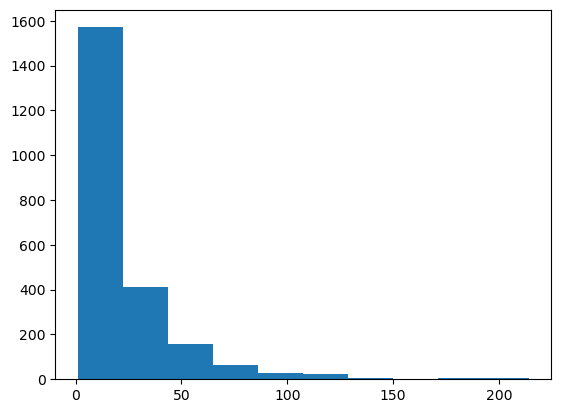

In [39]:
#绘制直方图查看访问次数
plt.hist(result.access,bins=10)
plt.show()

In [40]:
#根据直方图 去除两端极端值，去除最大值和最小值（>130,<10）
result.drop(result.loc[(result.access > 130)|(result.access < 10)],axis=1)
result
# plt.hist(result.access,bins=5)
# plt.show()

,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,2
1,4510001121,丰田-卡罗拉,2
2,4510001121,丰田-汉兰达,1
3,4510001121,吉利-博越,13
4,4510001121,吉利-帝豪,8
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,27
2271,5064573426,蔚来-蔚来ET7,17
2272,5064573426,长安-CS35 PLUS,9
2273,5064573426,长安-CS75 PLUS,2


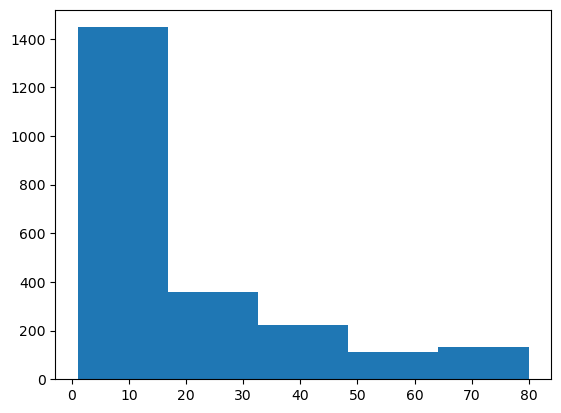

In [41]:
#最后，规范数据区间，将访问次数（access）大于80的数据设置为80。
result.loc[result.access > 80,'access'] = 80
result
plt.hist(result.access,bins=5)
plt.show()

In [42]:
'''
    采用最小-最大标准化方法进行访问次数（access）数据标准化，
    将访问次数映(access)射为1-5之间的评分(rank)。
'''
def min_max_scale(data,new_min,new_max):
    new = ((data - data.min()) / (data.max() - data.min())) * (new_max - new_min) + new_min
    return new
result.access = min_max_scale(result.access,1,5)
result.access = result.access.apply(lambda x:int(x))
result

,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,1
1,4510001121,丰田-卡罗拉,1
2,4510001121,丰田-汉兰达,1
3,4510001121,吉利-博越,1
4,4510001121,吉利-帝豪,1
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,2
2271,5064573426,蔚来-蔚来ET7,1
2272,5064573426,长安-CS35 PLUS,1
2273,5064573426,长安-CS75 PLUS,1


In [43]:
'''
    标准差标准化数据：零均值标准差
    公式：X^* = (X - X.mean) / X.std()  
    小数定标标准化数据，移动小数位 k 取决于数据绝对值的最大值,数据映射在[-1,1]
    *移动的位数取决于最大绝对值的对数 e.g：lg 10^3 =3
    公式：X^* = X / 10^k
'''
import numpy
#E.g: 对用户每月支出信息表中的每月支出数据进行标准化
def function(data):
    new1 = (data - data.mean()) / data.std()
    return new1
pay['每月支出'] = function(pay['每月支出'])
pay

numpy.ceil(numpy.log10(999))
numpy.ceil(numpy.log10(99))
k = numpy.ceil(numpy.log10(67))

In [44]:
def function3(data):
    k = k = numpy.ceil(numpy.log10(numpy.abs(data).max()))
    new3 = (data) / 10 ** k
    return new3
pay['每月支出2'] = function3(pay.每月支出)
pay

,每月支出,每月支出2
编号,,
0,1.004110,0.100411
1,0.003042,0.000304
2,-1.390344,-0.139034
3,0.116930,0.011693
4,-0.107206,-0.010721
...,...,...
2170,-0.197715,-0.019771
2171,1.339206,0.133921
2172,0.840793,0.084079


In [46]:
def func(data):
    new = (data - data.mean()) /data.std()
    return new
result['access'] = func(result['access'])
result


,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,-0.566537
1,4510001121,丰田-卡罗拉,-0.566537
2,4510001121,丰田-汉兰达,-0.566537
3,4510001121,吉利-博越,-0.566537
4,4510001121,吉利-帝豪,-0.566537
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,0.424141
2271,5064573426,蔚来-蔚来ET7,-0.566537
2272,5064573426,长安-CS35 PLUS,-0.566537
2273,5064573426,长安-CS75 PLUS,-0.566537


In [47]:

def func2(data):
    new4 = (data) / 10 ** k
    return new4
result['access'] = func2(result.access)
result

,user_id,car_msg,access
0,4510001121,丰田-凯美瑞,-0.005665
1,4510001121,丰田-卡罗拉,-0.005665
2,4510001121,丰田-汉兰达,-0.005665
3,4510001121,吉利-博越,-0.005665
4,4510001121,吉利-帝豪,-0.005665
...,...,...,...
2270,5064573426,蔚来-蔚来ET5,0.004241
2271,5064573426,蔚来-蔚来ET7,-0.005665
2272,5064573426,长安-CS35 PLUS,-0.005665
2273,5064573426,长安-CS75 PLUS,-0.005665
